# Bike's Docks Saturation Analysis

## Introduction

In this analysis, I worked with a dataset related to bike usage. The company wants to understand how to minimize  a great pain point for their customers: the dock saturation.

Dock saturation happens when a bike station is full and customers cannot return their bikes. This situation can cause a lack of trust on the mean of transportation proposed by the company since it's not something predictable. As a result they might get late, have to change their path, walk more than expected, all situations that reduce customer satisfaction.

To help the company to solve this issue, I applied different classification models to predict dock saturation. I tested Logistic Regression, Classification Tree, and Random Forest models to compare their performance. The model with the highest prediction accuracy was selected for further analysis.

Using this model, the company can predict when dock saturation is most likely to happen. Based on this, they can take action to avoid it, such as offering free vouchers for nearby users to pick up bikes, removing bikes during specific periods of the day, or placing fewer bikes in specific stations depending on the weather conditions.

Being able to predict saturation helps improve the customer experience, reduce complaints, and increase trust in the transportation system. It also supports better resource planning and more efficient station management.

*Busines Questions

Previous clarifications, to understand users pattern behaviors, it was considered that saturation is a sign of high usage of bikes by the customers, since it indicates that the bikes have been rearranged around the city. In other words, if the docks are saturated it is because people took them from where they previously were and parked them were in the station that is now saturated.


In [89]:
# importing libraries
import pandas as pd                                  
import matplotlib.pyplot as plt                      
import seaborn as sns                                
import statsmodels.formula.api as smf                
from sklearn.model_selection import train_test_split 
import sklearn.linear_model                
import statsmodels.formula.api as smf 
from sklearn.preprocessing import StandardScaler 
import numpy as np
import warnings
import phik 
from sklearn.preprocessing import power_transform
from sklearn.tree import DecisionTreeClassifier         
from sklearn.tree import plot_tree                      
from sklearn.ensemble import RandomForestClassifier     
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score              
from sklearn.metrics import make_scorer                
from sklearn.metrics import confusion_matrix
from sklearn.metrics import (confusion_matrix,
                             roc_auc_score, precision_score, recall_score)


# Suppressing warnings
warnings.filterwarnings(action = 'ignore')


# Path
file = "C:/Users/yasca/Downloads/bikes.xlsx"


# Reading file
bikes = pd.read_excel( io     = file,
                       header = 0   )

# First look into the file
bikes.head()

,ID,Month,Day of Week,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,UV Index,Precipitation,Seasons,Holiday,SATURATED
0,1,Jan,Sunday,0,-3.2,40,0.5,1358,-14.9,0.00,0.0,Winter,Yes,0
1,2,Jan,Sunday,3,-4.0,44,1.0,2000,-14.4,0.00,0.0,Winter,Yes,0
2,3,Jan,Sunday,17,1.8,33,3.3,1913,-12.8,0.18,0.0,Winter,Yes,0
3,4,Jan,Sunday,20,-0.3,40,1.2,1936,-12.2,0.00,0.0,Winter,Yes,0
4,5,Jan,Monday,0,-1.8,54,1.1,1772,-9.8,0.00,0.0,Winter,No,0


In [90]:
# Renaming columns with spaces in the name to avoid errors afterwards
bikes = bikes.rename(columns={'Day of Week': 'Day_of_Week',
                        'Wind Speed': 'Wind_Speed',
                       'Dew Point Temperature': 'Dew_Point_Temperature',
                       'UV Index' : 'UV_Index'})

# Exploratory Data Analysis (EDA)

In [91]:
# Extracting General information about data
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1356 non-null   int64  
 1   Month                  1356 non-null   object 
 2   Day_of_Week            1356 non-null   object 
 3   Hour                   1356 non-null   int64  
 4   Temperature            1356 non-null   float64
 5   Humidity               1356 non-null   int64  
 6   Wind_Speed             1356 non-null   float64
 7   Visibility             1356 non-null   int64  
 8   Dew_Point_Temperature  1356 non-null   float64
 9   UV_Index               1356 non-null   float64
 10  Precipitation          1356 non-null   float64
 11  Seasons                1356 non-null   object 
 12  Holiday                1356 non-null   object 
 13  SATURATED              1356 non-null   int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 148.4+ 

In [92]:
# Checking if actually there is not null values
bikes.isnull().sum()

ID                       0
Month                    0
Day_of_Week              0
Hour                     0
Temperature              0
Humidity                 0
Wind_Speed               0
Visibility               0
Dew_Point_Temperature    0
UV_Index                 0
Precipitation            0
Seasons                  0
Holiday                  0
SATURATED                0
dtype: int64

In [93]:
# Seing general information about the data
bikes.describe()

,ID,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point_Temperature,UV_Index,Precipitation,SATURATED
count,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000
mean,678.500000,11.468289,12.746681,59.163717,1.700074,1419.502212,4.142699,0.548872,0.185029,0.488938
std,391.587793,6.943506,11.862988,20.891172,1.003253,616.608126,13.092783,0.858381,0.787694,0.500062
min,1.000000,0.000000,-16.900000,0.000000,0.000000,33.000000,-28.300000,0.000000,0.000000,0.000000
25%,339.750000,5.000000,2.975000,43.000000,0.900000,924.500000,-5.025000,0.000000,0.000000,0.000000
50%,678.500000,12.000000,13.200000,58.000000,1.500000,1665.000000,5.000000,0.010000,0.000000,0.000000
75%,1017.250000,18.000000,22.900000,76.000000,2.300000,1996.000000,15.500000,0.870000,0.000000,1.000000
max,1356.000000,23.000000,37.900000,98.000000,6.900000,2000.000000,26.100000,3.450000,12.000000,1.000000


### Data Preprocessing

#### Temperature

In [94]:
# Describing temperature
bikes['Temperature'].describe()

count    1356.000000
mean       12.746681
std        11.862988
min       -16.900000
25%         2.975000
50%        13.200000
75%        22.900000
max        37.900000
Name: Temperature, dtype: float64

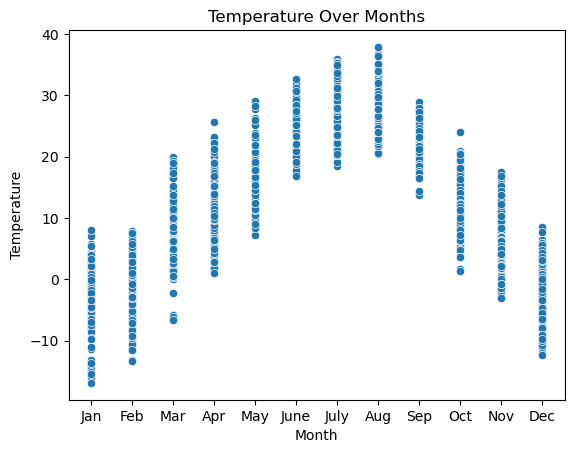

In [95]:
# Plotting Temperature Over the Year
sns.scatterplot(data=bikes, x="Month", y="Temperature")

plt.xlabel("Month")
plt.ylabel("Temperature")
plt.title("Temperature Over Months")

plt.show()

This graph shows us how the temperature in the city of San Francisco changes over the months. However, the temperature observed in the describe and in the plot don't match with is usually observed in the city. San Francisco is know for its mild weather, so the measures of -16 F and 37 F might indicate that is something wrong in this data. And accordingly to the data dictionary, this measure should be in Fahrenheit which makes the situation even worse.

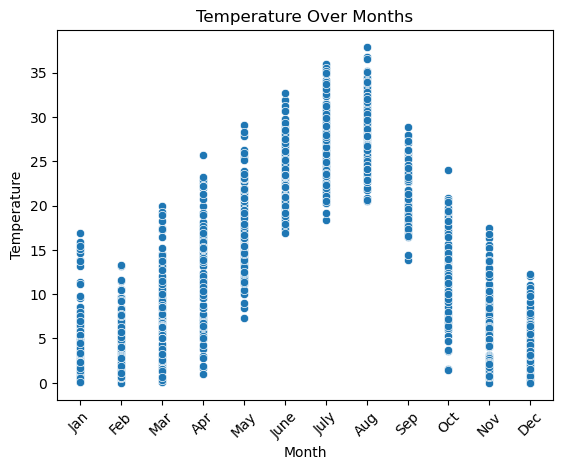

In [96]:
# Ploting with absolute temperature
sns.scatterplot(data=bikes, x="Month", y=abs(bikes["Temperature"]))

plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.title("Temperature Over Months")

plt.show()

To deal with this situation a solution was consider that the temperature data was actually in Celsius. This might explain better the maximum of 37 degrees, even if it is still high for the average temperature in the city, it is not something impossible to reach as a maximum temperature. However it doesn't solve the whole problem as the minimum temperature would be of -16 degrees, would is not something common in the city that hardly reaches negative temperature.

However, if you consider just the absolute values for temperature, you have a situation that matches way better with San Francisco's reality. So the final decision to deal with the temperature data, was to understand it as absolute values in Celsius (which for feature engineering purposes will be transformed in Fahrenheit)

In [97]:
# Replacing the Temperature Values, per its absolute values
bikes["Temperature"] = abs(bikes["Temperature"])

### Feature Engineering 

#### Temperature Feeling

The first feature to be engineered is Temperature_Feeling. 

The sensation that customers might have during their biking experience might not be completed reflected in temperature, since there are more factors that impact on temperature feeling.

Two indexes were applied: Heat Index and Wind Chill, both provided by the National Weather Service.


In [98]:
# Transforming the temperature in Fahrenheit
bikes["Temperature"] = (bikes["Temperature"]*(9/5))+32

In [99]:
# Calculating Tempetature_Feeling
bikes["Temperature_Feeling"] = np.where( #(ChatGPT, 2025)
  # Applying Wind Chill index (National Weather Service, n.d.)
    bikes["Temperature"] <= 50,
    35.74 + (bikes["Temperature"]*0.6215) - ((bikes["Wind_Speed"]**0.16)*35.75) 
    + (0.4275*bikes["Temperature"]*(bikes["Wind_Speed"]**0.16)), 
    
    # Applying heat index (National Weather Service, n.d.)
    np.where(
    bikes["Temperature"] >= 80.6,
        (-42.379 
        + (2.04901523 * bikes["Temperature"]) 
        + (10.14333127 * bikes["Humidity"])
        - (0.22475541 * bikes["Temperature"] * bikes["Humidity"]) 
        - (0.00683783 * (bikes["Temperature"]**2))
        - (0.05481717 * bikes["Humidity"]**2) 
        + (0.00122874 * (bikes["Temperature"]**2) * bikes["Humidity"])  
        + (0.00085282 * bikes["Temperature"] * (bikes["Humidity"]**2))
        - (0.00000199 * (bikes["Temperature"]**2) * (bikes["Humidity"]**2))),
        
    bikes["Temperature"]).round(1)
)


In [100]:
# Checking the data
bikes[bikes["Temperature"] < 50].head(5)

,ID,Month,Day_of_Week,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point_Temperature,UV_Index,Precipitation,Seasons,Holiday,SATURATED,Temperature_Feeling
0,1,Jan,Sunday,0,37.76,40,0.5,1358,-14.9,0.00,0.0,Winter,Yes,0,41.658546
1,2,Jan,Sunday,3,39.20,44,1.0,2000,-14.4,0.00,0.0,Winter,Yes,0,41.110800
2,3,Jan,Sunday,17,35.24,33,3.3,1913,-12.8,0.18,0.0,Winter,Yes,0,32.602736
3,4,Jan,Sunday,20,32.54,40,1.2,1936,-12.2,0.00,0.0,Winter,Yes,0,33.477997
4,5,Jan,Monday,0,35.24,54,1.1,1772,-9.8,0.00,0.0,Winter,No,0,36.638906


#### Dummy variables

Some of the features are categorical as Month, season, Days of Week and Holiday. After checking that all the data followed the same pattern category wise, it was possible to star working with it. All the categorical data will be transformed into dummy variables so the models can extract the most of the interpretation.

As month and Season are related, they were split into two datasets to avoid multicollinearity and other problems that the models might face. They will be used separately throughout the whole analysis.

In [101]:
# Checking the unique values of variables
unique_month = bikes['Month'].unique()
unique_season = bikes['Seasons'].unique()
unique_week = bikes['Day_of_Week'].unique()
unique_holiday = bikes['Holiday'].unique()

print (f""" Show Unique values of:
            Month: {unique_month}
            Season: {unique_season}
            Days of Week: {unique_week}
            Holiday : {unique_holiday}""")

 Show Unique values of:
            Month: ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'June' 'July' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
            Season: ['Winter' 'Spring' 'Summer' 'Autumn']
            Days of Week: ['Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday']
            Holiday : ['Yes' 'No']


In [102]:
# Separating the features that will be transformed in dummy variables
# Separating dataset in two, one for months and the other one fot seasons
bikes_dummies_month = bikes[['Holiday','Day_of_Week', 'Month']]
bikes_dummies_seasons = bikes[['Holiday','Day_of_Week','Seasons']]
bikes_dummies_month = pd.get_dummies(bikes_dummies_month, dtype= int)
bikes_dummies_seasons = pd.get_dummies(bikes_dummies_seasons, dtype= int)

# Checking month
bikes_dummies_month.head(5)

,Holiday_No,Holiday_Yes,Day_of_Week_Friday,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday,Month_Apr,...,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [103]:
# Checking season
bikes_dummies_seasons.head(5)

,Holiday_No,Holiday_Yes,Day_of_Week_Friday,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,0,1,0,0,0,1,0,0,0,0,0,0,1
1,0,1,0,0,0,1,0,0,0,0,0,0,1
2,0,1,0,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0,1,0,0,0,0,0,0,1
4,1,0,0,1,0,0,0,0,0,0,0,0,1


#### Is Weekend

Another important feature developed is "Is Weekend" because more than telling us the days of the week it discriminates between business days and weekends, this was features to help to answer the first question about the usage's purpose.

In [104]:
# Creating is Weekend feature
bikes["Is_Weekend"] = np.where( #(ChatGPT, 2025)
    (bikes["Day_of_Week"] == "Saturday") | (bikes["Day_of_Week"] == "Sunday"),
    1, 
    0)

# Checking new feature
bikes["Is_Weekend"].describe()

count    1356.000000
mean        0.298673
std         0.457845
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Is_Weekend, dtype: float64

#### After Commuting Hour

To also help us understand the usage purpose, the feature Commuting hours was created. The idea is to identify if the stations are saturated because people used them to go to work. So the feature looks to moments from Monday to Friday during business hours, if the stations are identified as saturated during this period it means that they used them to commute and dropped them at the stations close from their companies.

In [105]:
# Creating Commuting Hour Feature
bikes["Commuting_Hour"] = np.where( #(ChatGPT, 2025)
    (bikes["Hour"] >= 9) & (bikes["Hour"] <= 18) & (bikes["Day_of_Week"] != "Saturday") | (bikes["Day_of_Week"] != "Sunday"),
    1, 

    0)


# Checking new feature
bikes["Commuting_Hour"].describe()

count    1356.000000
mean        0.913717
std         0.280885
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Commuting_Hour, dtype: float64

#### Is Extreme Temperature

To understand even further the relationship between the temperature and the user behavior, the feature Extreme Temperature was created. This will point out when the wheather is too hot or too cold do discorage customers from riding a bike

In [106]:
bikes['Temperature_Feeling'].describe()

count    1356.000000
mean       58.967790
std        18.301358
min        27.664421
25%        42.528256
50%        56.750000
75%        73.200000
max       112.100000
Name: Temperature_Feeling, dtype: float64

In [107]:
# Extreme Temperature

bikes["Extreme_Temperature"] = np.where( #(ChatGPT, 2025)
        (bikes["Temperature_Feeling"] <= 42 ) | (bikes["Temperature_Feeling"] >= 73 ),
        1,
        0)

# Checking new feature
bikes["Extreme_Temperature"].describe()

count    1356.000000
mean        0.491150
std         0.500106
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Extreme_Temperature, dtype: float64

#### Final Organization after feature engineering

In [108]:
# Excluding string columns of time and ID
bikes_dropped = bikes.drop(columns = ['ID','Holiday','Seasons', 'Month', 'Day_of_Week', 'Is_Weekend', 'Commuting_Hour',
       'Extreme_Temperature'])

# Excluding one of each one of the dummy columns
bikes_dummies_month = bikes_dummies_month.drop(columns = ['Day_of_Week_Saturday','Holiday_No','Month_Dec'])
bikes_dummies_seasons = bikes_dummies_seasons.drop(columns = ['Day_of_Week_Saturday','Holiday_No','Seasons_Winter'])


In [109]:
# Including saturated in the separaded variables to run the correlation afterwards
bikes_dummies_month   = pd.concat([bikes[['SATURATED', 'Is_Weekend', 'Commuting_Hour',
       'Extreme_Temperature']],bikes_dummies_month], axis = 1)
bikes_dummies_seasons = pd.concat([bikes[['SATURATED', 'Is_Weekend', 'Commuting_Hour',
       'Extreme_Temperature']],bikes_dummies_seasons], axis = 1)

# Creating Datasets with all the variables to use in the models
bikes_month   = pd.concat([bikes_dropped,bikes_dummies_month], axis = 1)
bikes_seasons = pd.concat([bikes_dropped,bikes_dummies_seasons], axis = 1)

#### Describe

In [110]:
# Describe
bikes_month.describe()

,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point_Temperature,UV_Index,Precipitation,SATURATED,Temperature_Feeling,...,Month_Aug,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
count,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,...,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000
mean,11.468289,57.991018,59.163717,1.700074,1419.502212,4.142699,0.548872,0.185029,0.488938,58.967790,...,0.090708,0.083333,0.084808,0.088496,0.092920,0.078909,0.088496,0.076696,0.084071,0.064897
std,6.943506,17.514339,20.891172,1.003253,616.608126,13.092783,0.858381,0.787694,0.500062,18.301358,...,0.287299,0.276487,0.278699,0.284119,0.290428,0.269695,0.284119,0.266207,0.277596,0.246434
min,0.000000,32.000000,0.000000,0.000000,33.000000,-28.300000,0.000000,0.000000,0.000000,27.664421,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,41.720000,43.000000,0.900000,924.500000,-5.025000,0.000000,0.000000,0.000000,42.528256,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,56.570000,58.000000,1.500000,1665.000000,5.000000,0.010000,0.000000,0.000000,56.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,73.220000,76.000000,2.300000,1996.000000,15.500000,0.870000,0.000000,1.000000,73.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,23.000000,100.220000,98.000000,6.900000,2000.000000,26.100000,3.450000,12.000000,1.000000,112.100000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [111]:
# Describe
bikes_seasons.describe()

,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point_Temperature,UV_Index,Precipitation,SATURATED,Temperature_Feeling,...,Holiday_Yes,Day_of_Week_Friday,Day_of_Week_Monday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday,Seasons_Autumn,Seasons_Spring,Seasons_Summer
count,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,...,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000
mean,11.468289,57.991018,59.163717,1.700074,1419.502212,4.142699,0.548872,0.185029,0.488938,58.967790,...,0.043510,0.137168,0.133481,0.144543,0.154867,0.136431,0.139381,0.225664,0.242625,0.272124
std,6.943506,17.514339,20.891172,1.003253,616.608126,13.092783,0.858381,0.787694,0.500062,18.301358,...,0.204078,0.344152,0.340219,0.351769,0.361912,0.343372,0.346471,0.418173,0.428829,0.445218
min,0.000000,32.000000,0.000000,0.000000,33.000000,-28.300000,0.000000,0.000000,0.000000,27.664421,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,41.720000,43.000000,0.900000,924.500000,-5.025000,0.000000,0.000000,0.000000,42.528256,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,56.570000,58.000000,1.500000,1665.000000,5.000000,0.010000,0.000000,0.000000,56.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,73.220000,76.000000,2.300000,1996.000000,15.500000,0.870000,0.000000,1.000000,73.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,23.000000,100.220000,98.000000,6.900000,2000.000000,26.100000,3.450000,12.000000,1.000000,112.100000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Correlation

##### Correlation Continuous and Non- Continuous Values

In [112]:
# Checking correlation
bikes_corr = bikes_dropped.corr(method = 'pearson').round(decimals = 3)
bikes_corr_result = bikes_corr['SATURATED'].sort_values(ascending = False)

# Checking correlation
bikes_month_phi_corr = bikes_dummies_month.phik_matrix().round(decimals = 3)
bikes_month_phi_corr_result = bikes_month_phi_corr['SATURATED'].sort_values(ascending = False)

# Checking correlation
bikes_seasons_phi_corr = bikes_dummies_seasons.phik_matrix().round(decimals = 3)
bikes_seasons_phi_corr_result = bikes_seasons_phi_corr['SATURATED'].sort_values(ascending = False)

# Printing Correlations Organized

print (f"""
Continuous
----------------------------
{bikes_corr_result}

Non_Continuous
-----------------------------------
Month
--------------
{bikes_month_phi_corr_result}

Season
--------------
{bikes_seasons_phi_corr_result}

"""
)



interval columns not set, guessing: ['SATURATED', 'Is_Weekend', 'Commuting_Hour', 'Extreme_Temperature', 'Holiday_Yes', 'Day_of_Week_Friday', 'Day_of_Week_Monday', 'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Tuesday', 'Day_of_Week_Wednesday', 'Month_Apr', 'Month_Aug', 'Month_Feb', 'Month_Jan', 'Month_July', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep']
interval columns not set, guessing: ['SATURATED', 'Is_Weekend', 'Commuting_Hour', 'Extreme_Temperature', 'Holiday_Yes', 'Day_of_Week_Friday', 'Day_of_Week_Monday', 'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Tuesday', 'Day_of_Week_Wednesday', 'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer']

Continuous
----------------------------
SATURATED                1.000
Temperature              0.548
Temperature_Feeling      0.535
Dew_Point_Temperature    0.405
UV_Index                 0.387
Hour                     0.306
Visibility               0.207
Wind_Speed               0.

In [113]:
# Taking the Y values before doing the transformation to preserve their binary nature
bikes_month  = bikes_month.drop(columns = 'SATURATED')
bikes_seasons = bikes_seasons.drop(columns = 'SATURATED')

# Transformation

Skewness Before Transformation with Seasons

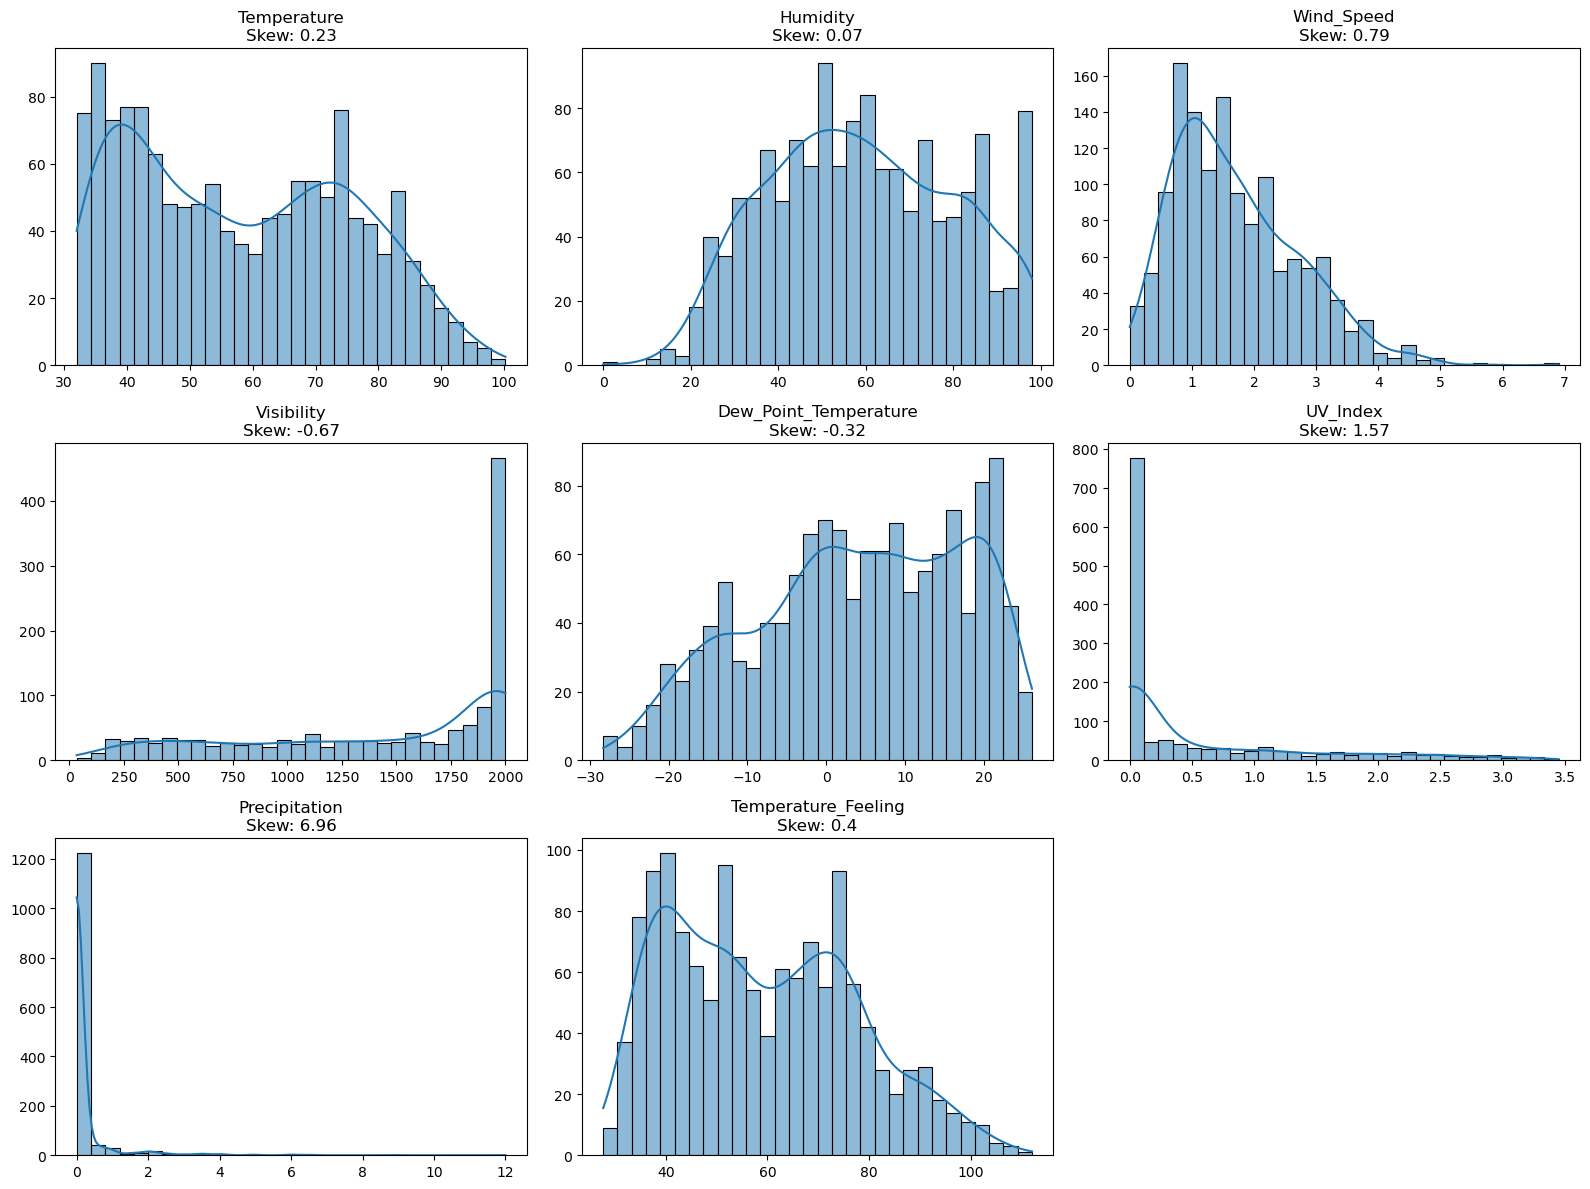

In [114]:
# List of numerical columns
cols = [
    'Temperature', 'Humidity', 'Wind_Speed', 'Visibility',
    'Dew_Point_Temperature', 'UV_Index', 'Precipitation', 'Temperature_Feeling'
]

# Create subplots
plt.figure(figsize=(16, 12))
for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(bikes_seasons[col], kde=True, bins=30)
    skew_val = bikes_seasons[col].skew().round(2)
    plt.title(f"{col}\nSkew: {skew_val}")
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


##### Yeo-Johnson Transformation

###### Month

In [115]:
# Transform Data in Month
transformed_data_month = power_transform(X           = bikes_month,
                                         method      = 'yeo-johnson',
                                         standardize = True)

# Transform results from the transformation in a DataFrame
transformed_data_month_df = pd.DataFrame(data = transformed_data_month,
                                         columns = list(bikes_month.columns))

skew_power_month = transformed_data_month_df.skew().round(decimals = 2)


###### Season

In [116]:
# Transform Data in Season
transformed_data_seasons = power_transform(X         = bikes_seasons,
                                         method      = 'yeo-johnson',
                                         standardize = True)

# Transform results from the transformation in a DataFrame
transformed_data_seasons_df = pd.DataFrame(data = transformed_data_seasons,                            
                                           columns = list(bikes_seasons.columns))

skew_power_season = transformed_data_seasons_df.skew().round(decimals = 2)

###### Data Skeewness after yeo-johnson 

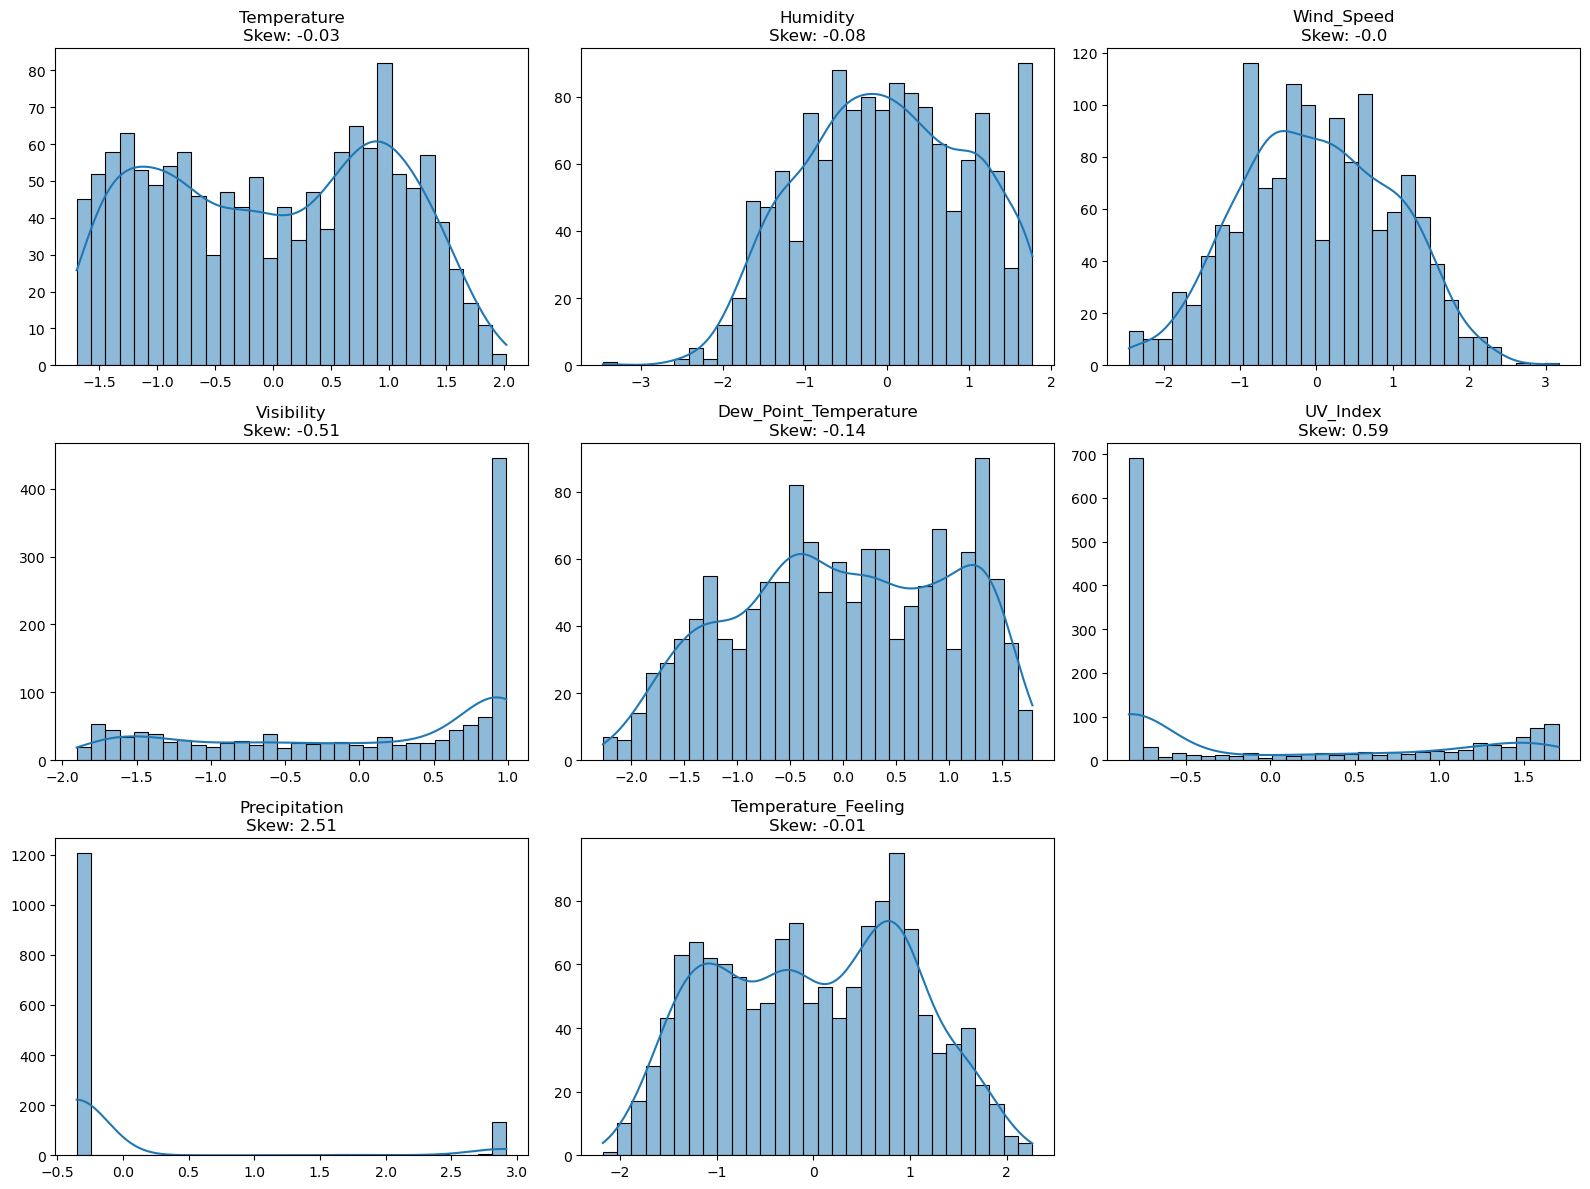

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns
cols = [
    'Temperature', 'Humidity', 'Wind_Speed', 'Visibility',
    'Dew_Point_Temperature', 'UV_Index', 'Precipitation', 'Temperature_Feeling'
]

# Create subplots
plt.figure(figsize=(16, 12))
for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(transformed_data_month_df[col], kde=True, bins=30)
    skew_val = transformed_data_month_df[col].skew().round(2)
    plt.title(f"{col}\nSkew: {skew_val}")
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


The plots above show the continuous feature's distribution after the transformation. Comparing with the plots created after the transformation, it is possible to see that the skeewness is way weaker after the transformation in most cases. The method that 

### Standardization

#### Standardization Formula

In [118]:
def standard_scaler(df):

    # Instantiating StandardScaler()
    scaler = StandardScaler(copy = True)


    # Fitting
    scaler.fit(df)


    # Scaling data
    x_scaled = scaler.transform(df)

    
    # Transforming the data into an pandas DataFrame
    new_df = pd.DataFrame(x_scaled)


    # Including the column's names in the df
    new_df.columns = list(df.columns)
    
    return new_df


#### Month

In [119]:
# Storaging the standardized data in a new variable
x_data_standard_month = standard_scaler(df = transformed_data_month_df)

In [120]:
# Checking it
x_data_standard_month.describe(include = 'number').round(decimals = 2)

,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point_Temperature,UV_Index,Precipitation,Temperature_Feeling,Is_Weekend,...,Month_Aug,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
count,1356.00,1356.00,1356.00,1356.00,1356.00,1356.00,1356.00,1356.00,1356.00,1356.00,...,1356.00,1356.00,1356.00,1356.00,1356.00,1356.00,1356.00,1356.00,1356.0,1356.00
mean,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.0,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00
min,-1.90,-1.70,-3.46,-2.45,-1.90,-2.27,-0.83,-0.35,-2.18,-0.65,...,-0.32,-0.30,-0.30,-0.31,-0.32,-0.29,-0.31,-0.29,-0.3,-0.26
25%,-0.88,-0.92,-0.75,-0.77,-0.90,-0.74,-0.83,-0.35,-0.89,-0.65,...,-0.32,-0.30,-0.30,-0.31,-0.32,-0.29,-0.31,-0.29,-0.3,-0.26
50%,0.16,0.04,-0.02,-0.04,0.35,0.00,-0.78,-0.35,0.02,-0.65,...,-0.32,-0.30,-0.30,-0.31,-0.32,-0.29,-0.31,-0.29,-0.3,-0.26
75%,0.93,0.90,0.81,0.72,0.98,0.88,1.12,-0.35,0.84,1.53,...,-0.32,-0.30,-0.30,-0.31,-0.32,-0.29,-0.31,-0.29,-0.3,-0.26
max,1.52,2.02,1.77,3.17,0.99,1.79,1.71,2.92,2.27,1.53,...,3.17,3.32,3.29,3.21,3.12,3.42,3.21,3.47,3.3,3.80


In [121]:
# Creating a Y dataframe with data from the dataframe not transformed
y_data_month = bikes["SATURATED"]

#### Seasons

In [122]:
# Storaging the standardized data in a new variable
x_data_standard_seasons = standard_scaler(df = transformed_data_seasons_df)

In [123]:
# Checking it
x_data_standard_seasons.describe(include = 'number').round(decimals = 2)

,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point_Temperature,UV_Index,Precipitation,Temperature_Feeling,Is_Weekend,...,Holiday_Yes,Day_of_Week_Friday,Day_of_Week_Monday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday,Seasons_Autumn,Seasons_Spring,Seasons_Summer
count,1356.00,1356.00,1356.00,1356.00,1356.00,1356.00,1356.00,1356.00,1356.00,1356.00,...,1356.00,1356.00,1356.00,1356.00,1356.00,1356.00,1356.00,1356.00,1356.00,1356.00
mean,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.90,-1.70,-3.46,-2.45,-1.90,-2.27,-0.83,-0.35,-2.18,-0.65,...,-0.21,-0.40,-0.39,-0.41,-0.43,-0.40,-0.40,-0.54,-0.57,-0.61
25%,-0.88,-0.92,-0.75,-0.77,-0.90,-0.74,-0.83,-0.35,-0.89,-0.65,...,-0.21,-0.40,-0.39,-0.41,-0.43,-0.40,-0.40,-0.54,-0.57,-0.61
50%,0.16,0.04,-0.02,-0.04,0.35,0.00,-0.78,-0.35,0.02,-0.65,...,-0.21,-0.40,-0.39,-0.41,-0.43,-0.40,-0.40,-0.54,-0.57,-0.61
75%,0.93,0.90,0.81,0.72,0.98,0.88,1.12,-0.35,0.84,1.53,...,-0.21,-0.40,-0.39,-0.41,-0.43,-0.40,-0.40,-0.54,-0.57,1.64
max,1.52,2.02,1.77,3.17,0.99,1.79,1.71,2.92,2.27,1.53,...,4.69,2.51,2.55,2.43,2.34,2.52,2.48,1.85,1.77,1.64


In [124]:
# Creating a Y dataframe with data from the dataframe not transformed
y_data_seasons =  bikes['SATURATED']

# Spliting Test and Training Data

#### Month

In [125]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            x_data_standard_month,
            y_data_month,
            test_size    = 0.25,
            random_state = 219)


# merging training data for statsmodels
bikes_month_train = pd.concat([x_train, y_train], axis = 1)

bikes_month_train.head(5)

,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point_Temperature,UV_Index,Precipitation,Temperature_Feeling,Is_Weekend,...,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,SATURATED
1072,0.557154,0.620250,-1.434524,1.251399,0.932360,-0.266804,1.540507,-0.351307,0.573193,-0.652585,...,-0.301511,-0.304413,-0.311588,-0.320061,-0.292692,-0.311588,-0.288214,3.300718,-0.26344,1
640,0.683610,1.349682,-0.801418,1.319853,0.267487,0.775605,1.645538,-0.351307,1.247718,-0.652585,...,-0.301511,-0.304413,-0.311588,3.124405,-0.292692,-0.311588,-0.288214,-0.302964,-0.26344,1
180,0.930389,-1.479291,-0.110505,1.386742,0.855751,-0.837368,0.081829,-0.351307,-1.757603,-0.652585,...,3.316625,-0.304413,-0.311588,-0.320061,-0.292692,-0.311588,-0.288214,-0.302964,-0.26344,0
1100,1.050992,0.312110,-0.549661,-0.634911,0.400734,0.003779,-0.834809,-0.351307,0.272617,-0.652585,...,-0.301511,-0.304413,-0.311588,-0.320061,-0.292692,-0.311588,-0.288214,3.300718,-0.26344,1
521,-0.113522,0.388862,-0.649634,0.549865,0.989686,0.011875,1.644530,-0.351307,0.350127,-0.652585,...,-0.301511,-0.304413,-0.311588,-0.320061,-0.292692,3.209361,-0.288214,-0.302964,-0.26344,1


#### Seasons

In [126]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            x_data_standard_seasons,
            y_data_seasons,
            test_size    = 0.25,
            random_state = 219)


# merging training data for statsmodels
bikes_season_train = pd.concat([x_train, y_train], axis = 1)

bikes_season_train.head(5)

,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point_Temperature,UV_Index,Precipitation,Temperature_Feeling,Is_Weekend,...,Day_of_Week_Friday,Day_of_Week_Monday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,SATURATED
1072,0.557154,0.620250,-1.434524,1.251399,0.932360,-0.266804,1.540507,-0.351307,0.573193,-0.652585,...,-0.398716,-0.392483,-0.411054,2.336053,-0.397473,-0.402435,1.852396,-0.565995,-0.611441,1
640,0.683610,1.349682,-0.801418,1.319853,0.267487,0.775605,1.645538,-0.351307,1.247718,-0.652585,...,-0.398716,-0.392483,-0.411054,-0.428073,-0.397473,2.484875,-0.539841,-0.565995,1.635481,1
180,0.930389,-1.479291,-0.110505,1.386742,0.855751,-0.837368,0.081829,-0.351307,-1.757603,-0.652585,...,-0.398716,-0.392483,-0.411054,2.336053,-0.397473,-0.402435,-0.539841,-0.565995,-0.611441,0
1100,1.050992,0.312110,-0.549661,-0.634911,0.400734,0.003779,-0.834809,-0.351307,0.272617,-0.652585,...,-0.398716,-0.392483,-0.411054,-0.428073,-0.397473,2.484875,1.852396,-0.565995,-0.611441,1
521,-0.113522,0.388862,-0.649634,0.549865,0.989686,0.011875,1.644530,-0.351307,0.350127,-0.652585,...,2.508052,-0.392483,-0.411054,-0.428073,-0.397473,-0.402435,-0.539841,1.766800,-0.611441,1


In [127]:
print(f"""
Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")


Response Variable Proportions (Training Set)
--------------------------------------------
SATURATED
0    0.51
1    0.49
Name: proportion, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
SATURATED
0    0.53
1    0.47
Name: proportion, dtype: float64



# Models

### Logistic Regression

#### Season

In [128]:
for val in bikes_season_train:
    print(f"""{val} 
+ """)

Hour 
+ 
Temperature 
+ 
Humidity 
+ 
Wind_Speed 
+ 
Visibility 
+ 
Dew_Point_Temperature 
+ 
UV_Index 
+ 
Precipitation 
+ 
Temperature_Feeling 
+ 
Is_Weekend 
+ 
Commuting_Hour 
+ 
Extreme_Temperature 
+ 
Holiday_Yes 
+ 
Day_of_Week_Friday 
+ 
Day_of_Week_Monday 
+ 
Day_of_Week_Sunday 
+ 
Day_of_Week_Thursday 
+ 
Day_of_Week_Tuesday 
+ 
Day_of_Week_Wednesday 
+ 
Seasons_Autumn 
+ 
Seasons_Spring 
+ 
Seasons_Summer 
+ 
SATURATED 
+ 


In [129]:
#### GOAT #####


# Logistic Regression With old Features


# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ SATURATED ~ Hour 
                                                    +                                                    + 
                                                    Humidity 
                                                    + 
                                                    Is_Weekend
                                                    +
                                                    Dew_Point_Temperature 
                                                    + 
                                                    UV_Index 
                                                    + 
                                                    Precipitation 
                                                    + 
                                                    Is_Weekend 
                                                    + 
                                                    Commuting_Hour 
                                                    + 
                                                    Seasons_Autumn 
                                                    + 
                                                    Seasons_Spring 
                                                    + 
                                                    Seasons_Summer 
                                                     """,
                                                     data    = bikes_season_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.327584
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:               Logit             Method:            MLE        
Dependent Variable:  SATURATED         Pseudo R-squared:  0.527      
Date:                2025-05-26 16:27  AIC:               688.3060   
No. Observations:    1017              BIC:               742.4767   
Df Model:            10                Log-Likelihood:    -333.15    
Df Residuals:        1006              LL-Null:           -704.87    
Converged:           1.0000            LLR p-value:       2.9523e-153
No. Iterations:      7.0000            Scale:             1.0000     
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
Intercept             -0.4329   0.1169 -3.7028 0.0002 -0.6621 -0.2038
Hour                   0.8607   0.1092  7.8789 0.0000  0.6466  1.0749
Humidity              -1.0580   0.1764 -5.9971 0.0000 -1.4038 -0.7123
Is_Weekend            -0.3634   0.1162 -3.1286 0.0018 -0.5911 -0.1357
Dew_Point_Temperature  1.3621   0.2521  5.4038 0.0000  0.8681  1.8562
UV_Index               0.5133   0.1279  4.0124 0.0001  0.2626  0.7640
Precipitation         -0.8137   0.1497 -5.4372 0.0000 -1.1070 -0.5204
Commuting_Hour        -0.0954   0.1112 -0.8577 0.3911 -0.3132  0.1225
Seasons_Autumn         1.6508   0.1862  8.8680 0.0000  1.2859  2.0156
Seasons_Spring         1.1815   0.1854  6.3746 0.0000  0.8183  1.5448
Seasons_Summer         1.4218   0.2713  5.2409 0.0000  0.8901  1.9536
=====================================================================

"""

##### Logistic Regression with Scikitlearn

In [130]:
# Defining x season data
x_data_season = bikes_seasons

# Defining y season data
y_data_season = bikes['SATURATED']

In [131]:
# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ["Hour", "Temperature", "Humidity", "Wind_Speed", 
                   "Visibility", "Dew_Point_Temperature", "UV_Index", 
                   "Precipitation", "Temperature_Feeling", "Is_Weekend", 
                   "Commuting_Hour", "Extreme_Temperature", "Holiday_Yes", 
                   "Day_of_Week_Friday", "Day_of_Week_Monday", 
                   "Day_of_Week_Sunday", "Day_of_Week_Thursday", 
                   "Day_of_Week_Tuesday", "Day_of_Week_Wednesday", 
                   "Seasons_Autumn", "Seasons_Spring", "Seasons_Summer"
],
 

 # p-value significant variables only
 'logit_sig'  : ["Hour", "Humidity", "Is_Weekend", "Dew_Point_Temperature", 
                   "UV_Index", "Precipitation", "Is_Weekend", 
                   "Commuting_Hour", "Seasons_Autumn", "Seasons_Spring", 
                   "Seasons_Summer"   ]

}

In [132]:
# train/test split with the full model
seasons_logistic_data   =  x_data_season[ candidate_dict["logit_sig"] ]
seasons_logistic_target =  y_data_season


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            seasons_logistic_data,
            seasons_logistic_target,
            random_state = 702,
            test_size    = 0.25,
            stratify     = seasons_logistic_target)

In [133]:

# Instantiating Logistic Regression
logreg = sklearn.linear_model.LogisticRegression(solver = 'lbfgs',
                                                 C = 1,
                                                 random_state = 702)


# Fitting
logreg_fit = logreg.fit(x_train, y_train)


# Predicting
logreg_pred = logreg_fit.predict(x_test)


# preparing AUC, precision, and recall
auc       = round(roc_auc_score(y_true = y_test, y_score = logreg_pred) , ndigits = 4)
precision = round(precision_score(y_true = y_test, y_pred = logreg_pred), ndigits = 4)
recall    = round(recall_score(y_true = y_test, y_pred = logreg_pred)   , ndigits = 4)


# dynamically printing metrics
print(f"""\
AUC:       {auc}
Precision: {precision}
Recall:    {recall}
""")

AUC:       0.8406
Precision: 0.8373
Recall:    0.8373



In [134]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 146
False Positives: 27
False Negatives: 27
True Positives : 139



In [135]:
# zipping each feature name to its coefficient
model_values = zip(seasons_logistic_data[candidate_dict[ 'logit_sig'] ].columns,
                           logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
model_lst = [('intercept', round(logreg_fit.intercept_[0], ndigits = 2))]


# printing out each feature-coefficient pair one by one
for val in model_values:
    model_lst.append(val)
    

# checking the results
for pair in model_lst:
    print(pair)

('intercept', 1.35)
('Hour', 0.12)
('Humidity', -0.07)
('Is_Weekend', -0.37)
('Is_Weekend', 0.15)
('Dew_Point_Temperature', 0.72)
('UV_Index', -1.33)
('Precipitation', -0.37)
('Is_Weekend', -0.4)
('Is_Weekend', 2.35)
('Commuting_Hour', 1.18)
('Seasons_Autumn', 1.21)


### Classification Tree

In [136]:
####################
## tuning_results ##
####################
def tuning_results(cv_results, n=5):
    
    # Help
    """
    This function will display the top "n" models from hyperparameter tuning,
    based on "rank_test_score".

    PARAMETERS
    ----------
    cv_results = results dictionary from the attribute ".cv_results_"
    n          = number of models to display
    """
    param_lst = []

    for result in cv_results["params"]:
        result = str(result).replace(":", "=")
        param_lst.append(result[1:-1])


    results_df = pd.DataFrame(data = {
        "Model_Rank" : cv_results["rank_test_score"],
        "Mean_Test_Score" : cv_results["mean_test_score"],
        "SD_Test_Score" : cv_results["std_test_score"],
        "Parameters" : param_lst
    })


    results_df = results_df.sort_values(by = "Model_Rank", axis = 0)
    return results_df.head(n = n)


#####################
## sklearn_summary ##
#####################
def classification_summary(x,
                           y,
                           model,
                           model_name   = "",
                           results_df   = None,
                           tt_split     = True,
                           test_size    = 0.25,
                           scale        = False,
                           full_tree    = False,
                           random_state = 702):
    # Help
    """  
    This function is designed to generate summary statistics for the following
    classification models from scikit-learn:
    * LogisticRegression         - Logistic Regression
    * DecisionTreeClassifier     - Classification Tree
    * RandomForestClassifier     - Random Forest
    * GradientBoostingClassifier - Gradient Boosted Machine


    Additional Functionality
    ------------------------
    This function will standardize the data using StandardScaler() and create
    training and testing sets using train-test split, stratifying the
    y-variable.
    
    It will also output a tabular confusion matrix, calculate area under the
    ROC curve (AUC) for the training and testing sets, as well as the train-
    test gap.
    

    PARAMETERS
    ----------
    x            | array     | X-data before train-test split | No default.
    y            | array     | y-data before train-test split | No default.
    model        | model     | model object to instantiate    | No default.
    model_name   | str       | option to name the model       | Default = ""
    results_df   | DataFrame | place to store model results   | Default = None
    test_size    | float     | test set proportion            | Default = 0.25
    scale        | bool      | whether to scale the data      | Default = False
    random_state | int       | seed for train-test split      | Default = 702
    """
    
    ###########
    # scaling #
    ###########
    
    if scale == True:
        # instantiating a StandardScaler() object
        scaler = StandardScaler(copy = True)


        # FITTING the scaler with the data
        scaler.fit(x)

        # TRANSFORMING our data after fit
        x_scaled = scaler.transform(x)

        # converting scaled data into a DataFrame
        x_scaled_df = pd.DataFrame(x_scaled)

        # reattaching column names
        x_scaled_df.columns = list(x.columns)

        # reverting back to x as the DataFrame's name
        x = x_scaled_df
    
    
    ####################
    # train-test split #
    ####################
    # standard train-test split
    x_train, x_test, y_train, y_test = train_test_split(x, # x
                                                        y, # y
                                                        test_size    = test_size,
                                                        random_state = random_state,
                                                        stratify     = y)
    
    
    #########################
    # fit - predict - score #
    #########################
    # fitting to training data
    model_fit = model.fit(x_train, y_train)


    # predicting on new data
    model_pred = model.predict(x_test)


    # scoring results
    model_train_auc   = round(roc_auc_score(y_true  = y_train,
                              y_score = model.predict(x_train)), ndigits = 4) # auc
    
    model_test_auc    = round(roc_auc_score(y_true  = y_test,
                              y_score = model.predict(x_test)),  ndigits = 4) # auc

    model_gap         = round(abs(model_train_auc - model_test_auc), ndigits = 4)

    
    ####################
    # confusion matrix #
    ####################
    full_tree_tn, \
    full_tree_fp, \
    full_tree_fn, \
    full_tree_tp = confusion_matrix(y_true = y_test, y_pred = model_pred).ravel()

    
    ###########################
    # storing/showing results #
    ###########################
    # instantiating a list to store model results
    results_lst = [ model_name, model_train_auc, model_test_auc, model_gap ]

    # converting to DataFrame
    results_lst = pd.DataFrame(data = results_lst)

    # transposing (rotating) DataFrame
    results_lst = np.transpose(a = results_lst)
    
    # if no results DataFrame provided
    if results_df == None:

        # concatenating to coef_df
        results_df = pd.DataFrame(data = results_lst)
    
    # if results DataFrame provided
    else:
        
        # concatenating to coef_df
        results_df = pd.concat(objs = [results_df, results_lst],
                               axis         = 0,
                               ignore_index = True)
        
    # adding column names
    results_columns = ['Model Name', 'train_auc', 'test_auc', 'tt_gap']
    
    # renaming columns
    results_df.columns = results_columns
    
    
    print(f"""
    Results for {model_name}
    {'=' * 20}
    Model Type: {model}
    Training Samples: {len(x_train)} 
    Testing  Samples: {len(x_test)}
    
    
    Summary Statistics
    ------------------
    AUC (Train): {model_train_auc}
    AUC (Test) : {model_test_auc}
    TT Gap     : {model_gap}
    
    
    Confusion Matrix (test set)
    ---------------------------
    True Negatives : {full_tree_tn}
    False Positives: {full_tree_fp}
    False Negatives: {full_tree_fn}
    True Positives : {full_tree_tp}
    """)
    

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    # Help
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    labels : DataFrame with labels (i.e., x_data)
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Feature_Importance_Plot.png')
        
        
########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    # Help
    """
    Creates a visualization of a confusion matrix.

    PARAMETERS
    ----------
    true_y : true values for the response variable
    pred_y : predicted values for the response variable
    labels : , default None
        """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')

    # Plot details
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    
    #Plot
    plt.show()
    

#### Season

This markdown below is the hyperparameter tuning run in this model, it is formated as a markdown since it can take too much time to run the notebook. But all the parameters pointed as the most important by this code, are the ones used on the model

####### choosing a hyperparameter and defining their ranges
criterion_range   = ["gini", "entropy", "log_loss"] # criterion
splitter_range    = ["best", "random"] # splitter
depth_range       = range(1,11) # max_depth
leaf_range        = np.arange(1, 30, 1) # min_samples_leaf
min_weight_range  = np.arange(0.0, 1.0, 0.3)
max_features      = np.arange(0, 30, 1)



####### creating a hyperparameter grid
param_grid = {'criterion'        : criterion_range,
              'splitter'         : splitter_range,
              'max_depth'        : depth_range,
              'min_samples_leaf' : leaf_range,
              'max_features'     : max_features,
              'min_weight_fraction_leaf' : min_weight_range}


####### Instantiating Decision Tree
model = DecisionTreeClassifier(random_state = 708)


####### RandomizedSearchCV and passing the hyperparameters
tuned_model = RandomizedSearchCV(estimator             = model,
                                 # Here the code generates all the
                                 # trees for you and then pick the ones with 
                                 # the best score
                                 param_distributions   = param_grid,
                                 cv                    = 5,
                                 n_iter                = 1000,
                                 random_state          = 702,
                                 scoring               = make_scorer(roc_auc_score,
                                                                     needs_threshold = False))


####### Fitting
tuned_model.fit(x_data_season, y_data_season)


####### Printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_model.best_params_)
print("Tuned Training AUC:", tuned_model.best_score_.round(4))

In [137]:
####### Decision Tree and passing the optimal hyperparameters
season_tree_model = DecisionTreeClassifier(splitter         = 'best',
                               min_samples_leaf = 10,
                               max_depth        = 4,
                               criterion        = 'log_loss',
                               min_weight_fraction_leaf = 0,
                               max_features = 21)


# Using the classification_summary function (UDF)
classification_summary(x          = x_data_season,
                       y          = y_data_season,
                       model      = season_tree_model,
                       model_name = "Season_Class_Tree")


    Results for Season_Class_Tree
    Model Type: DecisionTreeClassifier(criterion='log_loss', max_depth=4, max_features=21,
                       min_samples_leaf=10, min_weight_fraction_leaf=0)
    Training Samples: 1017 
    Testing  Samples: 339
    
    
    Summary Statistics
    ------------------
    AUC (Train): 0.9106
    AUC (Test) : 0.905
    TT Gap     : 0.0056
    
    
    Confusion Matrix (test set)
    ---------------------------
    True Negatives : 162
    False Positives: 11
    False Negatives: 21
    True Positives : 145
    


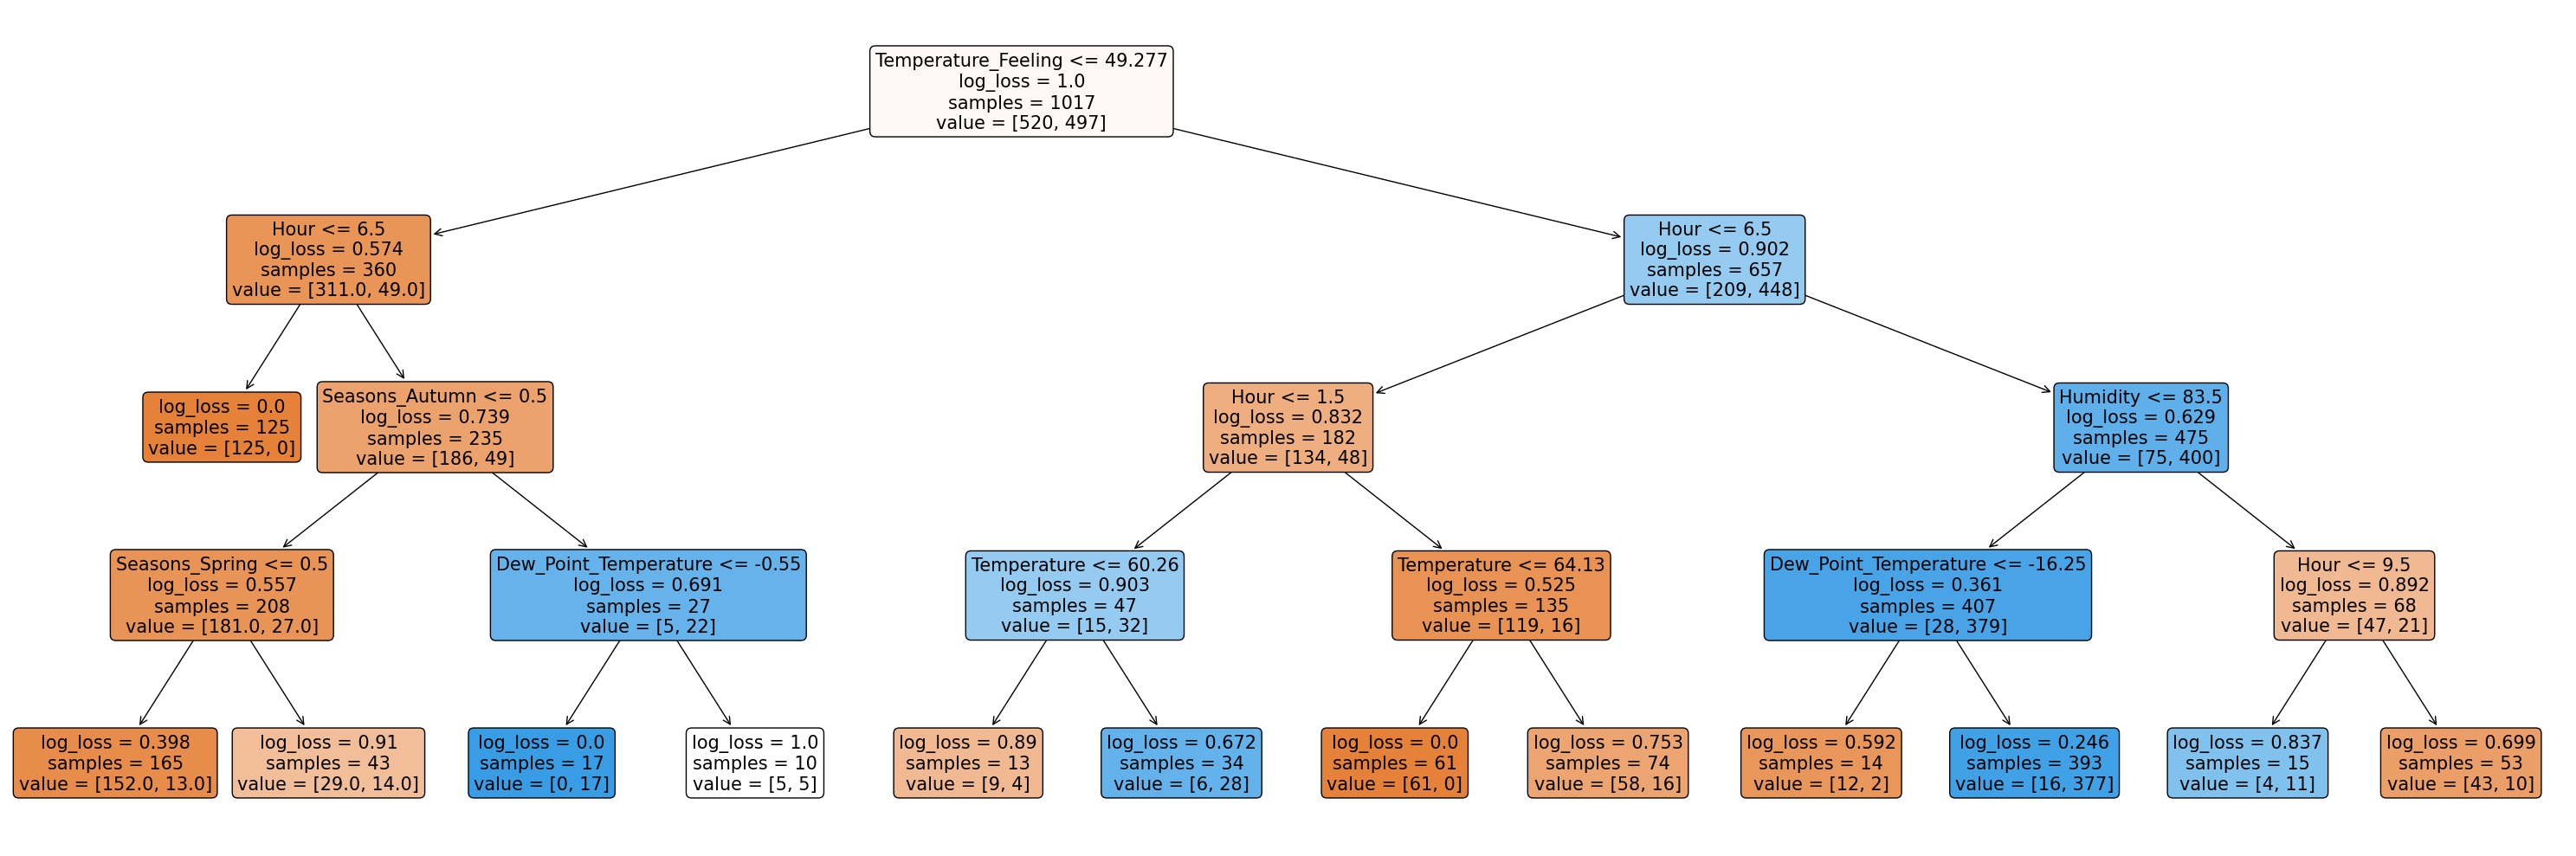

In [138]:
# setting figure size
plt.figure(figsize=(30, 10)) 


# developing a plotted tree
plot_tree(decision_tree = season_tree_model,
          feature_names = x_data_season.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 15) 


# rendering the plot
plt.tight_layout()
plt.show()

In the Decision Tree plotting it is possible to have a preview visualization of how the elements impact on the station's Saturation. The Tree shows, for example, that when the weather is cold. So the temperature feeling is under 49 F, the chances are that the docks are saturated. Which means that they haven been rearranged around the city by the customers. It's also possible to see the effects of seasons and hour in the bikes utilization

### Random Forest

#### Month

This markdown below is the hyperparameter tuning run in this model, it is formated as a markdown since it can take too much time to run the notebook. But all the parameters pointed as the most important by this code, are the ones used on the model

####### Choosing a hyperparameter and defining their ranges
estimator_range    = np.arange(100, 1000, 100)
leaf_range         = np.arange(1, 31, 10)
criterion_range    = ['gini', 'entropy', 'log_loss']
bootstrap_range    = [True, False]
warm_start_range   = [True, False]
max_depth_range    = np.arange(4, 8 , 1)


####### Creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_range,
              'min_samples_leaf' : leaf_range,
              'criterion'        : criterion_range,
              'bootstrap'        : bootstrap_range,
              'warm_start'       : warm_start_range,
              'max_depth'        : max_depth_range,
              'max_features'     : max_features_range,
              'bootstrap'        : bootstrap}


####### Instantiating Random Forest
model = RandomForestClassifier(random_state = 702)


####### RandomizedSearchCV and passing the hyperparameters
tuned_model = RandomizedSearchCV(estimator           = model,
                                 param_distributions = param_grid,
                                 cv                  = 5,
                                 n_iter              = 1000,
                                 random_state        = 702,
                                 scoring             = make_scorer(roc_auc_score,
                                                                   needs_threshold = False))

####### Fitting
tuned_model.fit(x_data_month, y_data_month)

####### Printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_model.best_params_)
print("Tuned Training AUC:", tuned_model.best_score_.round(decimals = 4))

In [139]:
####### Random Forest and passing the optimal hyperparameters
model = RandomForestClassifier(n_estimators     = 800,
                               criterion        = "log_loss",
                               max_depth        = 4,
                               min_samples_leaf = 11,
                               bootstrap        = False,
                               warm_start       = False,
                               random_state     = 702,
                               max_features     = 28)


# Using the classification_summary function (UDF)
classification_summary(x          = x_data_standard_month,
                       y          = y_data_month,
                       model      = model,
                       model_name = "Month Random Forest")




    Results for Month Random Forest
    Model Type: RandomForestClassifier(bootstrap=False, criterion='log_loss', max_depth=4,
                       max_features=28, min_samples_leaf=11, n_estimators=800,
                       random_state=702)
    Training Samples: 1017 
    Testing  Samples: 339
    
    
    Summary Statistics
    ------------------
    AUC (Train): 0.9047
    AUC (Test) : 0.896
    TT Gap     : 0.0087
    
    
    Confusion Matrix (test set)
    ---------------------------
    True Negatives : 161
    False Positives: 12
    False Negatives: 23
    True Positives : 143
    


#### Season

This markdown below is the hyperparameter tuning run in this model, it is formated as a markdown since it can take too much time to run the notebook. But all the parameters pointed as the most important by this code, are the ones used on the model

####### choosing a hyperparameter and defining their ranges
estimator_range    = np.arange(100, 1000, 100)
leaf_range         = np.arange(1, 31, 10)
criterion_range    = ['gini', 'entropy', 'log_loss']
bootstrap_range    = [True, False]
warm_start_range   = [True, False]
max_depth_range    = np.arange(4, 8 , 1)
#max_features_range = np.arange(1, 30, 3)

####### creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_range,
              'min_samples_leaf' : leaf_range,
              'criterion'        : criterion_range,
              'bootstrap'        : bootstrap_range,
              'warm_start'       : warm_start_range,
              'max_depth'        : max_depth_range,
              'max_features'     : max_features_range}


####### Instantiating Random Forest
model = RandomForestClassifier(random_state = 702)


####### RandomizedSearchCV and passing the hyperparameters
tuned_model = RandomizedSearchCV(estimator           = model,
                                 param_distributions = param_grid,
                                 cv                  = 5,
                                 n_iter              = 1000,
                                 random_state        = 702,
                                 scoring             = make_scorer(roc_auc_score,
                                 needs_threshold = False))


####### Fitting
tuned_model.fit(x_data_season, y_data_season)

####### Printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_model.best_params_)
print("Tuned Training AUC:", tuned_model.best_score_.round(decimals = 4))

In [140]:
####### Random Forest and passing the optimal hyperparameters
model = RandomForestClassifier(n_estimators     = 300,
                               criterion        = "entropy",
                               max_depth        = 4,
                               min_samples_leaf = 11,
                               bootstrap        = False,
                               warm_start       = True,
                               random_state     = 702,
                               max_features     = 16)


# Using the classification_summary function (UDF)
classification_summary(x          = x_data_standard_month,
                       y          = y_data_month,
                       model      = model,
                       model_name = "Month Random Forest")




    Results for Month Random Forest
    Model Type: RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=4,
                       max_features=16, min_samples_leaf=11, n_estimators=300,
                       random_state=702, warm_start=True)
    Training Samples: 1017 
    Testing  Samples: 339
    
    
    Summary Statistics
    ------------------
    AUC (Train): 0.9098
    AUC (Test) : 0.8933
    TT Gap     : 0.0165
    
    
    Confusion Matrix (test set)
    ---------------------------
    True Negatives : 159
    False Positives: 14
    False Negatives: 22
    True Positives : 144
    


### Grandient Boosted Machines GBM

#### Season - THE FINAL MODEL SELECTED (GBM SEASON)

This markdown below is the hyperparameter tuning run in this model, it is formated as a markdown since it can take too much time to run the notebook. But all the parameters pointed as the most important by this code, are the ones used on the model

####### choosing a hyperparameter and defining their ranges
loss_range       = ['log_loss', 'exponential']
n_estimators     = np.arange(0, 200, 10)
estimator_range  = np.arange(0.0, 2, 0.2)
criterion_range  = ['friedman_mse', 'squared_error']
depth_range      = np.arange(1,11, 2)
subsample        = np.arange(0.0, 1.0, 0.2)
min_samples_split= np.arange(0, 20, 3)


####### creating a hyperparameter grid
param_grid = {'loss'        : loss_range,
              'n_estimators': n_estimators,
              'criterion'   : criterion_range,
              'max_depth'   : depth_range,
              'subsample'   : subsample,
              'min_samples_split' : min_samples_split
             }


####### Instantiating GBM
model = GradientBoostingClassifier(random_state = 702)


####### GridSearchCV and passing the hyperparameters
tuned_model = RandomizedSearchCV(estimator           = model,
                                 param_distributions = param_grid,
                                 cv                  = 5,
                                 n_iter              = 500,
                                 random_state        = 702,
                                 scoring             = make_scorer(roc_auc_score,
                                                                   needs_threshold = False))


####### Fitting
tuned_model.fit(x_data_season, y_data_season)


####### Printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_model.best_params_)
print("Tuned Training AUC:", tuned_model.best_score_.round(4))

In [141]:
####### GridSearchCV and passing the optimal hyperparameters
model = GradientBoostingClassifier(loss          = 'exponential',
                                   subsample     = 0.6000000000000001,
                                   n_estimators  = 10,
                                   criterion     = 'friedman_mse',
                                   max_depth     = 5,
                                   min_samples_split = 15,
                                   random_state  = 702)


# Using the classification_summary function (UDF)
classification_summary(x          = x_data_season,
                       y          = y_data_season,
                       model      = model,
                       model_name = "Default Gradient Boosted Machine")


    Results for Default Gradient Boosted Machine
    Model Type: GradientBoostingClassifier(loss='exponential', max_depth=5,
                           min_samples_split=15, n_estimators=10,
                           random_state=702, subsample=0.6000000000000001)
    Training Samples: 1017 
    Testing  Samples: 339
    
    
    Summary Statistics
    ------------------
    AUC (Train): 0.9415
    AUC (Test) : 0.8995
    TT Gap     : 0.042
    
    
    Confusion Matrix (test set)
    ---------------------------
    True Negatives : 157
    False Positives: 16
    False Negatives: 18
    True Positives : 148
    


The confusion Matrix present above shows a high level of correct classifications, as well as the lowest level of False Negatives, our critical error control. In other words, we are trying to predict when the saturation will occur, therefore, it the saturation is happening, but I predict that it is not, the company won't take any actions to solve the customer's pain point.


##### 5. In your analytical opinion, which is the more critical error to control: false positives or false negatives? Provide a "human" context to the risk of each error and justify your rationale for minimizing one of them in terms of the business.
In my opinion, the more critical error to control is false negatives, since they give the company a bad perspective of how many docks have to be helped. As their goal is try to predict the saturation to be able to avoid it, predicting a false negative is predicting that that dock has space available when it actually don't have it. In other words, the company will not take measures to take bikes from the dock, it will continue saturated what will cause customer unsatisfaction, stress and lack of confidence in the bike's system. While the risk of false negatives are high, the risks of false positive will just involve taking action on a dock that doesn't need that much help at that moment, so the customers will end up having even more space to park their bikes, in other words, it won't affect the problem that the company is trying to solve, which is decreasing the saturation.


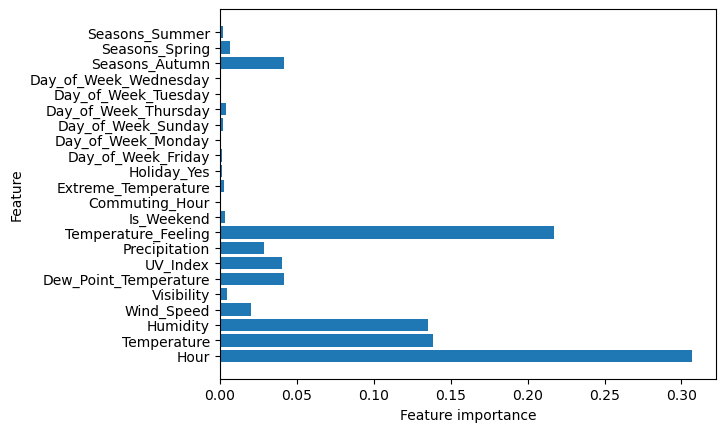

In [142]:
plot_feature_importances( model = model,
                          train = x_data_season)

##### 1. Based on your analysis, is bike sharing being used primarily for exercise, recreation, commuting to work, or some other purpose?
According to the GBM model, the Hour is a element if high importance on the bikes saturation. And looking at the correlation, the relation between them is positive, which indicates that people use the bikes latter on the day, since the biggest the hour, the biggest the saturation. 

Is weekend and Holiday_Yes on the other hand, are features that have a less relevance in the model, and considering that weekends and holidays are the moments where people would have more availability for recreation, the model seems to indicate that people use it more in business days. However it is possible to see that the bikes are not being used to go to work early in the morning, so probably they are being used or for exercise at night or going back home from work. 

To summarize, it is possible that the bikes are being use for commuting back home and exercising at night.

##### 2. Does dock saturation happens more often when temperature is ideal? If so, what is considered an "ideal" temperature, according to the data? Does this align with what is considered an ideal temperature for riding a bike, according to your research?
The model shows that temperature and temperature feeling are both relevant elements in bikes usage, both with a positive and strong relation with the saturated status. However, the feature extreme temperature feeling didn't show a great relevance for the model. The feature was build considering anything below 41 F and above 73 F at extreme temperature feeling, and this numbers were chosen because 41 represents the value on the data's first quadrant and 73 a number in the last quadrant, above 75% of the whole data. This was the range considered as the ideal temperature according to the data. However this range of temperature didn't contribute that much for the prediction, this indicates that the customers are more likely to use the bikes when the temperature is high and the ideal temperature range for biking is bigger than the one chose. 



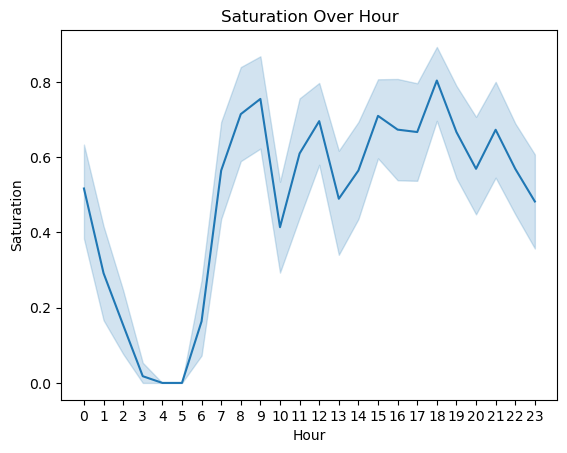

In [144]:
# Ploting with absolute temperature
sns.lineplot(data=bikes, x="Hour", y="SATURATED")

#(ChatGPT, 2025)
plt.xticks(range(24))
plt.xlabel("Hour")
plt.ylabel("Saturation")
plt.title("Saturation Over Hour")

plt.show()

##### 4. What is the most important factor (x-feature) in predicting dock saturation? Interpret the relationship between this factor and dock saturation (follows a linear trend, is it best expressed in ranges, etc.).
The most important factor in this research is Hour, it is a feature with high impact on the model, that has also appear in other models as a relevant feature as well. In the graph shown above it is possible to see how the relationship between Dock's Saturation and hours is not a linear relation, it has ranges were the saturation is more common as well as periods of the day where it is not that common. For example, it is clear to see that the saturation starts occurring latter in the morning, around 8 or 9 AM, and it has some variability from that on, achieving its pick around 8 PM (20:00).


##### 3. According to the data, are there times of day, months, or seasons that are expected to have higher dock saturation? Why or why not?
According to the data Hours plays a big role in saturation. It is also possible to see that the months representing the season of Autumn have a considerable impact on saturation. Because it is possible to see a high impact from both features in the model, as well as a positive correlation score. However, it is known that to have a real impact on saturation, the Autumn feature have to also count with other elements as temperature feeling for example. In other words, it is possible to see that autumn is related to saturation as long as it is related to the right temperatures and the measurements are made in the right time.
